# 케라스 MNIST 숫자 이미지 분류 CNN 모델 예제

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist

plt.style.use('fivethirtyeight')

In [2]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, InputLayer, MaxPooling2D

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) [7 2 1 ... 4 5 6]


In [5]:
X = np.expand_dims(train_images, -1).astype("float32") / 255 
X_tst = np.expand_dims(test_images, -1).astype("float32") / 255
print(X.shape, train_labels.shape, X_tst.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [6]:
model = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8

In [7]:
model.fit(X, train_labels, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 8s 16ms/step - loss: 0.4528 - accuracy: 0.8560
Epoch 2/3
469/469 [==============================] - 8s 17ms/step - loss: 0.1375 - accuracy: 0.9583
Epoch 3/3
469/469 [==============================] - 8s 17ms/step - loss: 0.1026 - accuracy: 0.9681


In [8]:
p = model.predict(X_tst)
print(p[0])

[4.8698844e-08 7.9686885e-10 4.2747351e-06 9.6295025e-07 8.5404149e-11
 3.1321712e-09 4.9731327e-14 9.9999213e-01 5.4194807e-08 2.5541756e-06]


Text(0, 0.5, 'Probability Score')

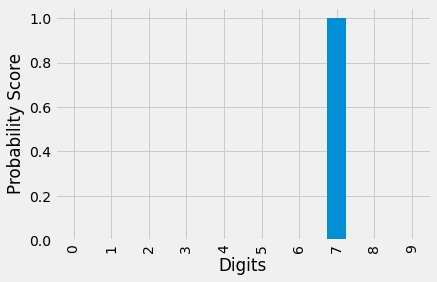

In [9]:
ax = pd.Series(p[0]).plot.bar()
ax.set_xlabel('Digits')
ax.set_ylabel('Probability Score')

In [10]:
test_loss, test_acc = model.evaluate(X_tst, test_labels)
print(f"test_acc: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9851
test_acc: 0.9851
